# Optimal Execution of Trades in the FX Market

In [70]:
from optexec import dataloader, execution, misc

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

sns.set(rc = {"figure.figsize":(16, 9)})

In [71]:
T = 200
W = np.ones(shape = 5, dtype = int) * 500

## TWAP

In [72]:
lst_twap = []

start = 5
num = T - (start - 1)
ELL = np.linspace(start = start, stop = T, num = num, endpoint = True, dtype = int)

for L in tqdm(ELL):
    orderbook_bid = dataloader.OnlineData('data/bid.tsv')
    orderbook_ask = dataloader.OnlineData('data/ask.tsv')

    twap = execution.TWAP(T, L, W)
    lst_twap.append(twap.cumulative_impact(orderbook_bid, orderbook_ask)*100)

    orderbook_ask.close()
    orderbook_bid.close()

100%|██████████| 196/196 [00:06<00:00, 31.41it/s]


In [73]:
len(lst_twap)

196

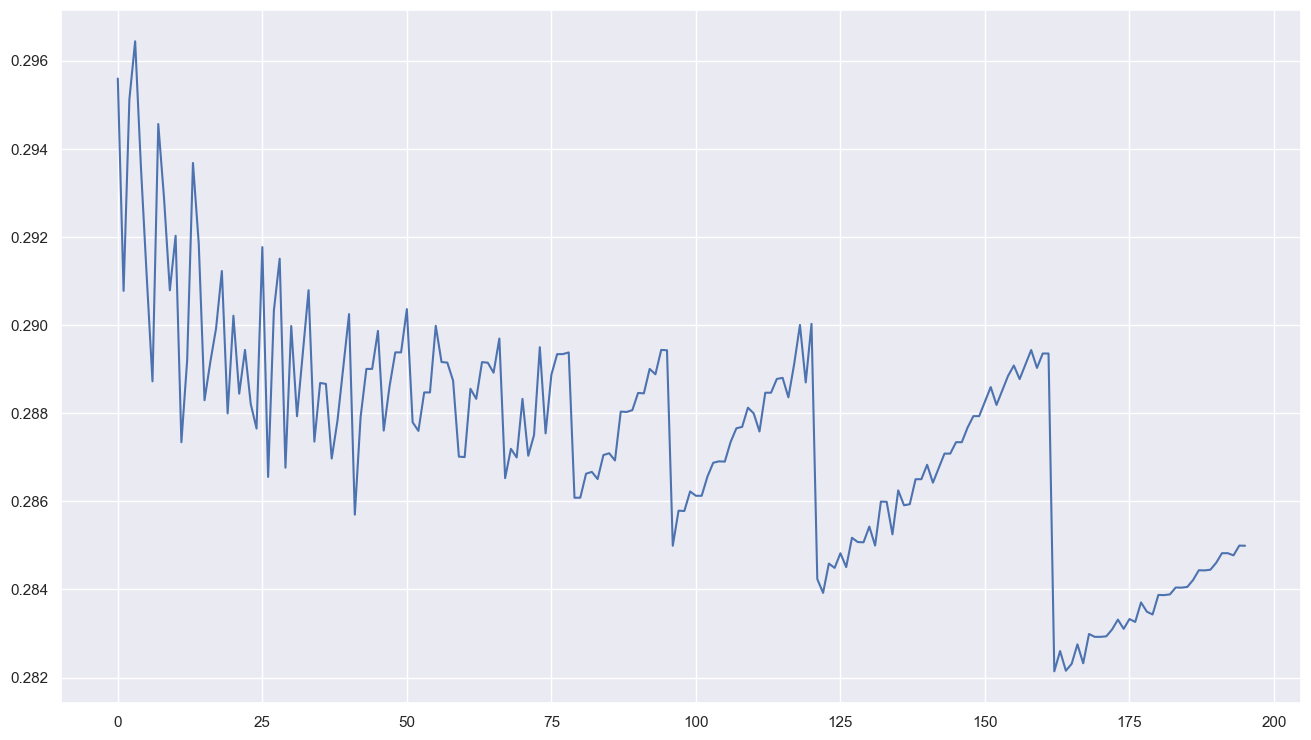

In [74]:
sns.lineplot(lst_twap);

## AC